In [17]:
# Netflix EDA & Content Trends
#**Author:** Your Name  
#**Date:** 2025-11-_

#**Goal:** Explore Netflix titles to surface trends: release volume over time, popular genres, country-level patterns, rating distributions, and interesting content insights.  
#**Dataset:** `netflix_titles.csv` (common Kaggle format) — columns typically include: show_id, type, title, director, cast, country, date_added, release_year, rating, duration, listed_in (genres), description

In [18]:
# install libraries
!pip install pandas matplotlib seaborn plotly scikit-learn wordcloud


In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from wordcloud import WordCloud, STOPWORDS
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [20]:
#display settings
%matplotlib inline
plt.style.use('seaborn-v0_8')
sns.set_context("talk")

In [2]:
import pandas as pd
df = pd.read_csv(r'C:\Users\brund\analytics\netflix_titles.csv')
df.shape

(8807, 12)

In [3]:
df.head(11)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [5]:
df.describe(include='all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8807.000000,8803,8804,8807,8807
unique,8807,2,8804,4528,7692,748,1767,NaN,17,220,514,8775
top,s8807,Movie,15-Aug,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,2,19,19,2818,109,NaN,3207,1793,362,4
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.180198,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.819312,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019.000000,NaN,NaN,NaN,NaN


In [6]:
#TRUE - NaN(1)
#FALSE - cell contains valid values(0)
# df.isna - it checks everycell in the datafarame and replace it with boolean values "T" or "F"
missing_values=df.isna().sum().sort_values(ascending=False)
missing_values[missing_values>0]

director      2634
country        831
cast           825
date_added      10
rating           4
duration         3
dtype: int64

In [7]:
import pandas as pd
import numpy as np
# Parse dates
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

# Convert listed_in to lists
df['genres'] = df['listed_in'].fillna('').apply(lambda x: [g.strip() for g in x.split(',') if g.strip()])

# Create numeric duration and duration_unit
def parse_duration(d):
    if pd.isna(d): return (np.nan, None)
    parts = d.split()
    if len(parts) == 2 and parts[1].startswith('min'):
        return (int(parts[0]), 'minutes')
    elif len(parts) == 2 and parts[1].startswith('Season'):
        return (int(parts[0]), 'seasons')
    else:
        return (np.nan, None)

df[['duration_val', 'duration_unit']] = df['duration'].apply(lambda x: pd.Series(parse_duration(x)))
#df[['duration_val', 'duration_unit']].head(10)
df['duration_unit'].isna().sum()

np.int64(3)

In [8]:
#Split countries
df['country'] = df['country'].fillna('')
df['primary_country'] = df['country'].apply(lambda x: x.split(',')[0].strip() if x else np.nan)
#df[['country', 'primary_country']].head()
df['primary_country'].isna().sum()

np.int64(831)

In [9]:
# year_added & month_added
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month
#df[['date_added', 'year_added', 'month_added']].head()

In [10]:
#drop duplicates
df = df.drop_duplicates(subset=['title', 'type', 'release_year'])
#df[['title','type','release_year']].head()

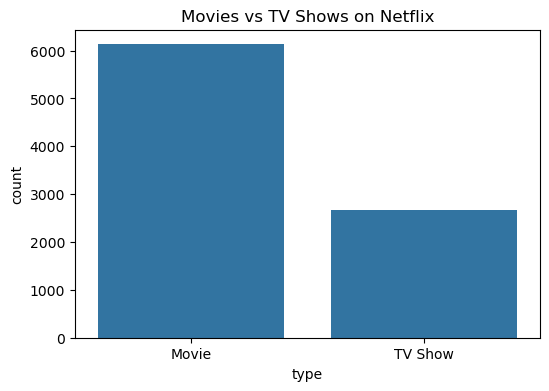

In [11]:
# Movie vs TV shows on Netflix
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.countplot(data=df, x='type', order=df['type'].value_counts().index)
plt.title('Movies vs TV Shows on Netflix')
plt.show()

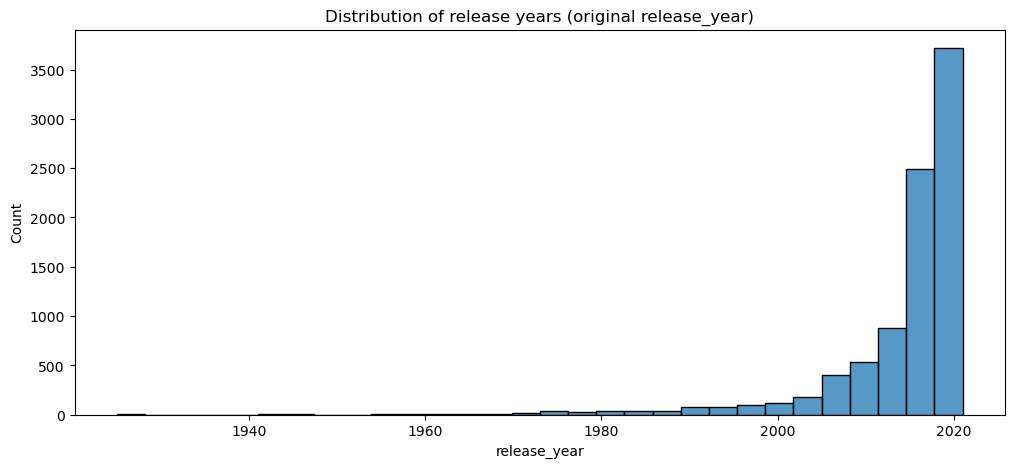

In [12]:
# content by release year 
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,5))
sns.histplot(df['release_year'].dropna(), bins=30)
plt.title('Distribution of release years (original release_year)')
plt.show()

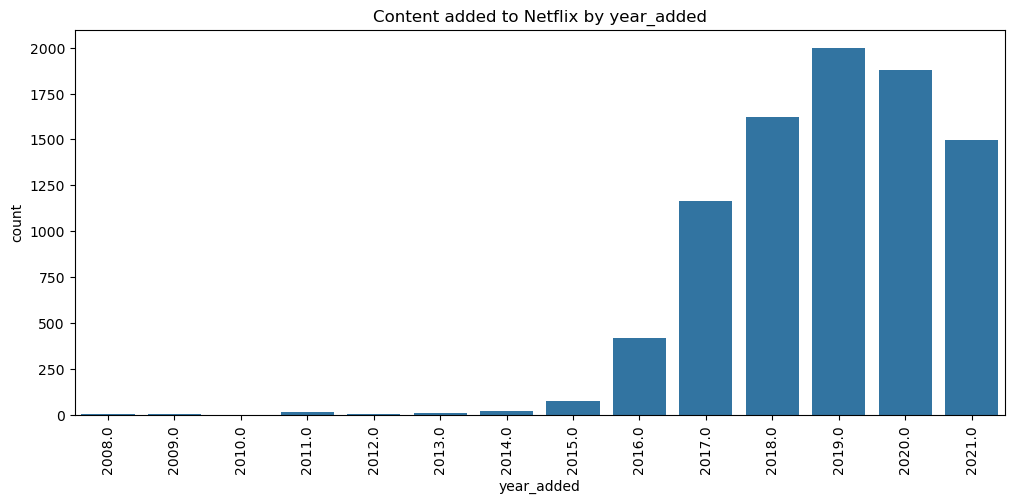

In [13]:
plt.figure(figsize=(12,5))
sns.countplot(data=df, x='year_added', order=sorted(df['year_added'].dropna().unique()))
plt.xticks(rotation=90)
plt.title('Content added to Netflix by year_added')
plt.show()

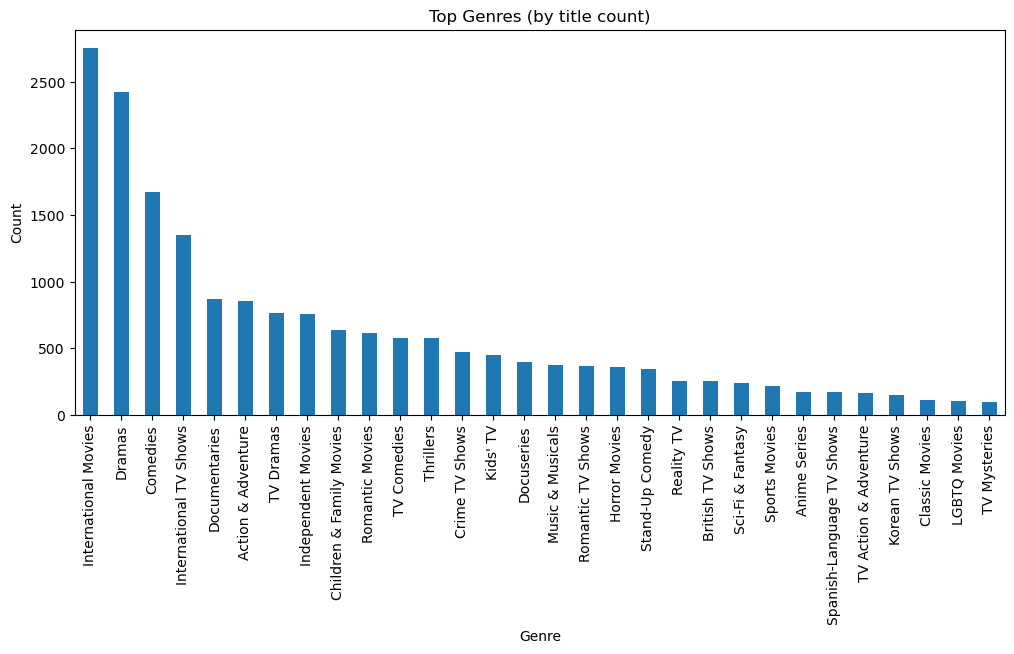

In [14]:
#Genres Analysis 
import matplotlib.pyplot as plt
genre_df = df.explode('genres')
genre_counts = genre_df['genres'].value_counts().head(30)
genre_counts.plot(kind='bar', figsize=(12,5))
plt.title('Top Genres (by title count)')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.show()

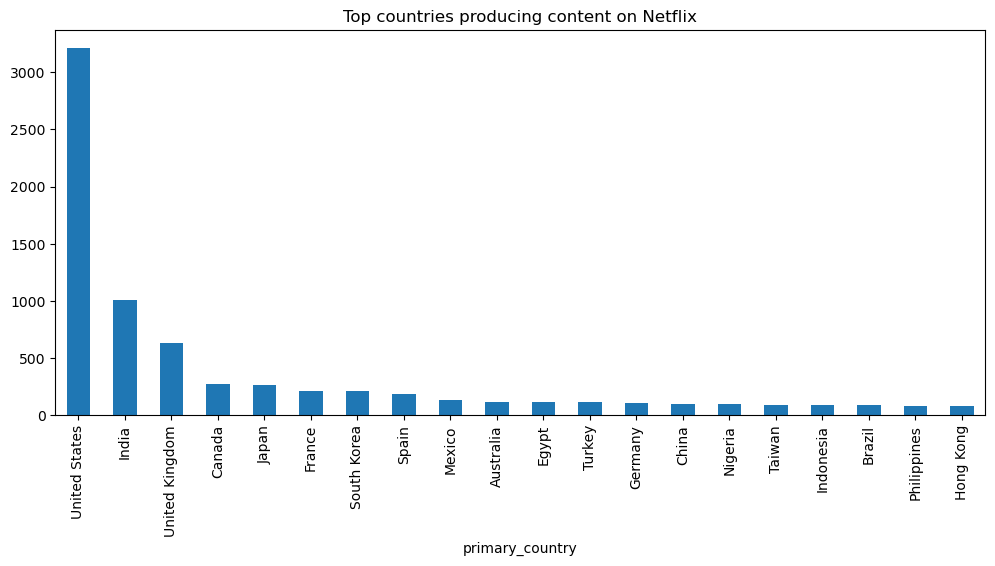

In [15]:
#Country Analysis
import matplotlib.pyplot as plt

top_countries = df['primary_country'].value_counts().head(20)
top_countries.plot(kind='bar', figsize=(12,5))
plt.title('Top countries producing content on Netflix')
plt.show()

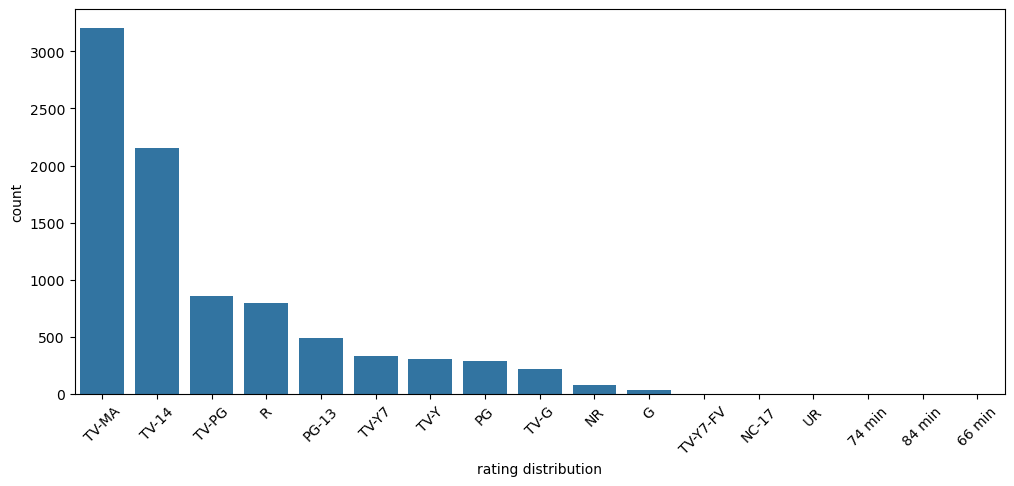

In [16]:
#ratings distribution
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,5))
sns.countplot(data=df,x='rating', order=df['rating'].value_counts().index)
plt.xticks(rotation=45)
plt.xlabel('rating distribution')
plt.show()

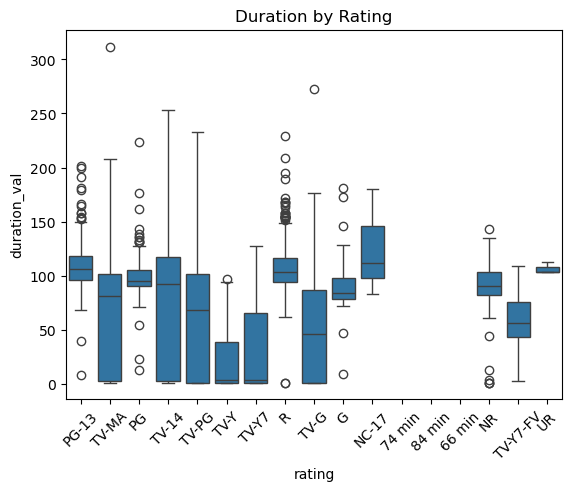

In [17]:
#Duration by Ratings
import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(data=df, x='rating', y='duration_val')
plt.xticks(rotation=45)
plt.title('Duration by Rating')
plt.show()


In [18]:
df['type'].unique()

array(['Movie', 'TV Show'], dtype=object)

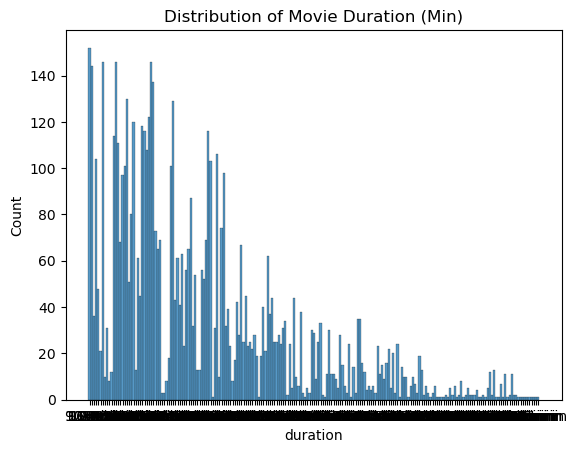

In [19]:
# Duration movie analysis
import matplotlib.pyplot as plt
import seaborn as sns

movies = df[df['type'].str.lower() == 'movie'].copy()

# This variable holds the CLEANED duration data (a pandas Series)
duration_date = movies['duration'].dropna() 

# Pass the 'duration_date' VARIABLE directly, NOT movies['duration_date']
sns.histplot(duration_date, bins=30) 
plt.title('Distribution of Movie Duration (Min)')
plt.show()

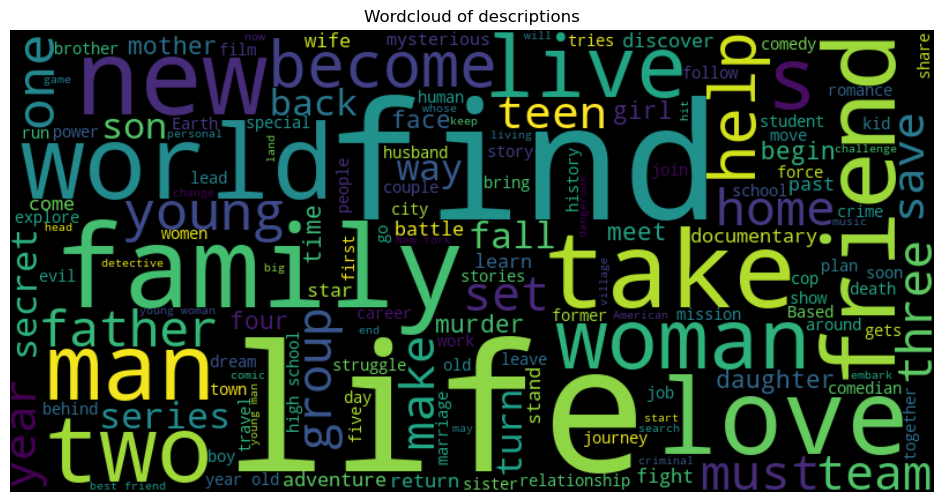

In [20]:
#wordcloud of description (textual insight about the description column)

import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS 

text = ' '.join(df['description'].dropna().tolist())
stopwords = set(STOPWORDS)
wc = WordCloud(width=800, height=400, stopwords=stopwords, max_words=150).generate(text)

plt.figure(figsize=(15,6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title('Wordcloud of descriptions')
plt.show()

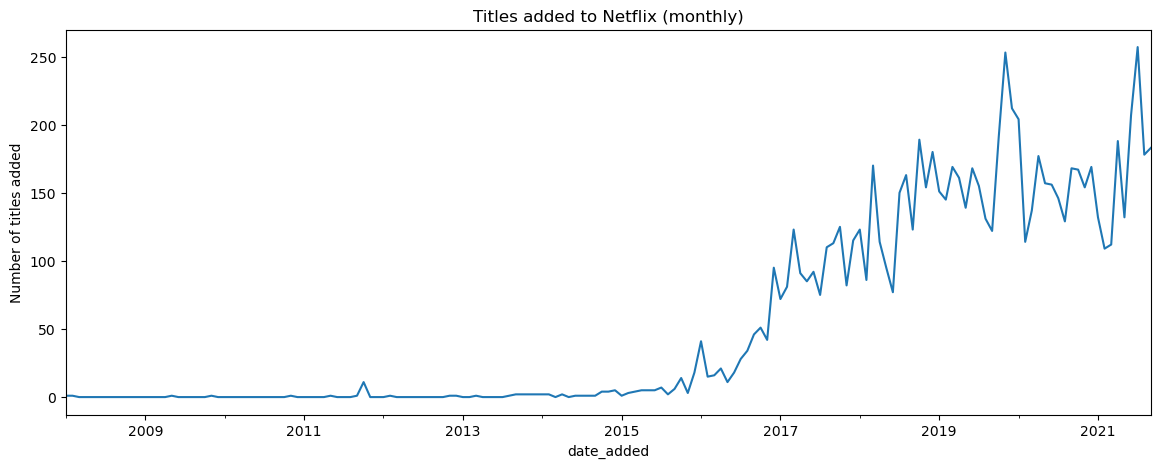

In [21]:
#time series (titles added to netflix by months)
import matplotlib.pyplot as plt

timeseries = df.dropna(subset=['date_added']).set_index('date_added').resample('ME').size()
timeseries.plot(figsize=(14,5))
plt.title('Titles added to Netflix (monthly)')
plt.ylabel('Number of titles added')
plt.show()

In [29]:
# Assuming 'df' is your original DataFrame
X = df[['release_year', 'duration_val']].copy()
X['num_genres'] = df['genres'].apply(len)
X['desc_len'] = df['description'].fillna('').apply(len)

# Keep rows with no NaN in chosen features and run K-Means
X = X.dropna()

# You need to import these for the preceding steps to work
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
# ...

scaler = StandardScaler()
X_s = scaler.fit_transform(X)

# Assume KMeans is correctly imported and run
kmeans = KMeans(n_clusters=4, random_state=42)
labels = kmeans.fit_predict(X_s)

# CRITICAL LINE: This adds the 'cluster' column to X
X['cluster'] = labels

In [30]:
# 1. Select the features and the new 'cluster' label
cluster_features = ['release_year', 'duration_val', 'num_genres', 'desc_len', 'cluster']
df_clustered = X[cluster_features] # X is now defined

# 2. Group the data by the 'cluster' column and calculate the mean for each feature
cluster_summary = df_clustered.groupby('cluster').mean()

# 3. Print the resulting table
print(cluster_summary)

         release_year  duration_val  num_genres    desc_len
cluster                                                    
0         2015.212050    110.374591    2.996730  142.565624
1         2015.526207     92.483861    1.586911  143.448327
2         2017.046232      2.819075    2.291955  142.479432
3         1986.867537    108.748134    2.317164  149.524254


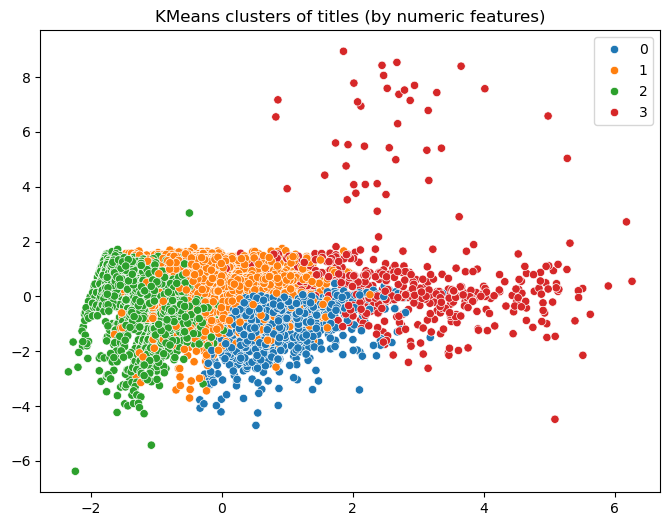

In [31]:
X = df[['release_year','duration_val']].copy()
X['num_genres'] = df['genres'].apply(len)
X['desc_len'] = df['description'].fillna('').apply(len)

# keep rows with no NaN in chosen features
import os

# Set the environment variable to your desired number of logical cores (e.g., 8)
# If you don't know the exact number, you can use the built-in os.cpu_count()
os.environ['LOKY_MAX_CPU_COUNT'] = str(os.cpu_count())
from sklearn.preprocessing import StandardScaler
X = X.dropna()
scaler = StandardScaler()
X_s = scaler.fit_transform(X)

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=42)
labels = kmeans.fit_predict(X_s)
X['cluster'] = labels
 
# visualize clusters using PCA for 2D
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
proj = pca.fit_transform(X_s)
plt.figure(figsize=(8,6))
sns.scatterplot(x=proj[:,0], y=proj[:,1], hue=labels, palette='tab10')
plt.title('KMeans clusters of titles (by numeric features)')
plt.show()


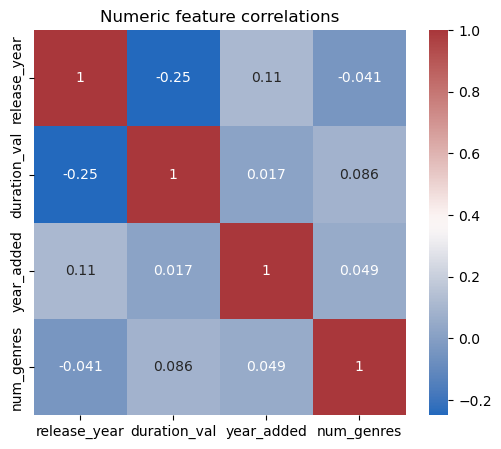

In [32]:
#Correlation & Heatmap
import matplotlib.pyplot as plt
import seaborn as sns

num = df[['release_year','duration_val','year_added']].copy()
num['num_genres'] = df['genres'].apply(len)
corr = num.corr()
plt.figure(figsize=(6,5))
sns.heatmap(corr, annot=True, cmap='vlag')
plt.title('Numeric feature correlations')
plt.show()


In [33]:
# top directors by number of titles
top_directors = df['director'].value_counts().head(20)
top_directors

# top titles per country
top_titles_country = df.groupby('primary_country')['title'].count().sort_values(ascending=False).head(10)
top_titles_country


primary_country
United States     3211
India             1007
United Kingdom     628
Canada             271
Japan              259
France             212
South Korea        211
Spain              181
Mexico             134
Australia          117
Name: title, dtype: int64